In [1]:
import Hokusai
import PyPlot

In [2]:
# variables/parameters
img = 1
sigma = 50
tau = 60
symmetrize = false #reversible MC?
method = :crispness #which method should be used for optimisation
ratematrix = false #select highest/lowest eigenvalue
# possible number of clusters
kmin = 3
kmax = 10

10

In [8]:
function minChi(image, sigma, tau, symmetrize, ratematrix, kmin, kmax)
    P, pi = Hokusai.getTransitionmatrixAndPi(image, sigma, tau, symmetrize, ratematrix)
    minchi = zeros(kmax - kmin + 1, 2)
    for k = kmin:kmax
        #println(k," clusters")
        # schurfactorization
        X, λ = Hokusai.schurvectors(P, pi, k, ratematrix)
        # compute A via prechosen fct obj
        A = Hokusai.guessinit(X)
        chi = X*A
        #println("minChi: ",findmin(chi))
        minchi[k - kmin + 1, 2] = findmin(chi)[1]
        minchi[k - kmin + 1, 1] = k
    end
    minchi
end

minChi (generic function with 1 method)

image1
[3.0 -0.124972; 4.0 -0.346527; 5.0 -0.53515; 6.0 -0.450007; 7.0 -0.495487; 8.0 -0.196145; 9.0 -0.682823; 10.0 -0.424226]
image2
[3.0 -0.926031; 4.0 -0.699978; 5.0 -0.366184; 6.0 -0.271276; 7.0 -0.406877; 8.0 -0.853243; 9.0 -0.193939; 10.0 -0.318141]
image3
[3.0 -0.283604; 4.0 -0.287839; 5.0 -0.626013; 6.0 -0.595143; 7.0 -0.562961; 8.0 -0.240875; 9.0 -0.149735; 10.0 -0.321879]
image4
[3.0 -0.442142; 4.0 -0.596107; 5.0 -0.428621; 6.0 -0.819718; 7.0 -0.43303; 8.0 -0.507137; 9.0 -0.169853; 10.0 -0.408341]
image5
[3.0 -0.780404; 4.0 -0.874191; 5.0 -0.494574; 6.0 -0.423747; 7.0 -0.588489; 8.0 -0.590046; 9.0 -0.603091; 10.0 -0.488688]
image6
[3.0 -0.882273; 4.0 -0.751304; 5.0 -0.70471; 6.0 -0.22121; 7.0 -0.635434; 8.0 -0.344599; 9.0 -0.788242; 10.0 -0.79858]
image7
[3.0 -0.477909; 4.0 -0.701012; 5.0 -0.179678; 6.0 -0.770847; 7.0 -0.480779; 8.0 -0.544426; 9.0 -0.507864; 10.0 -0.429914]
image8


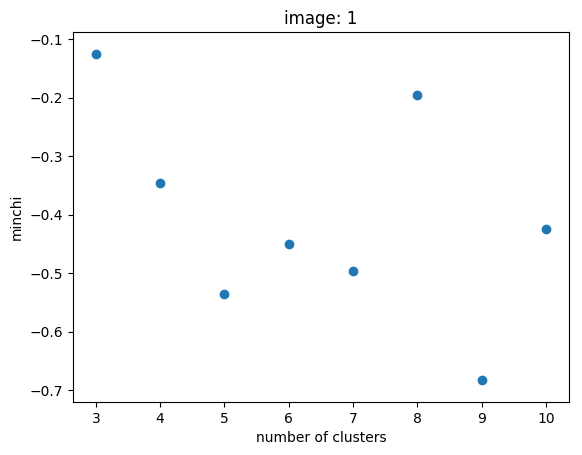

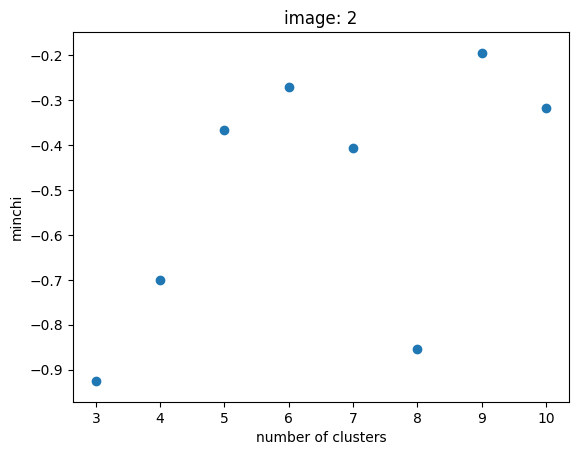

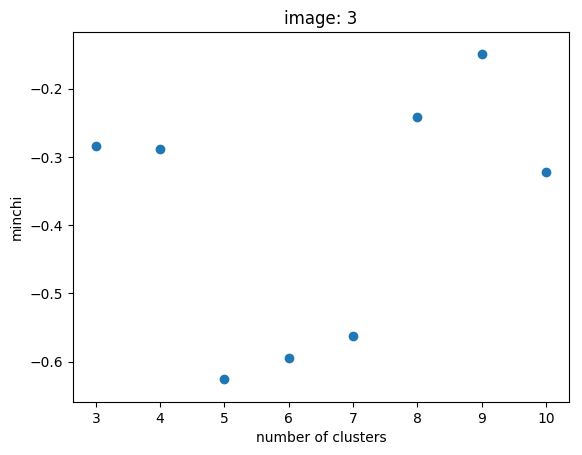

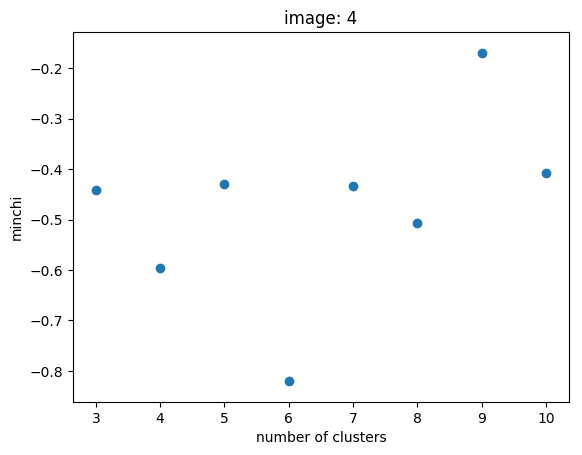

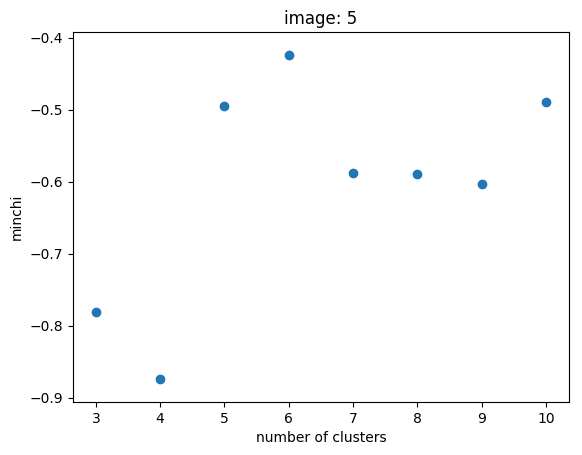

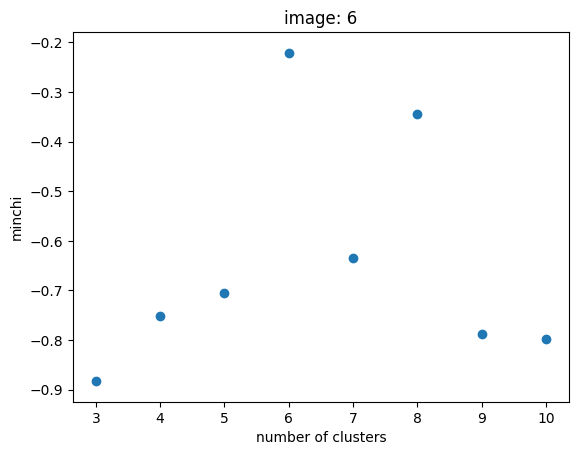

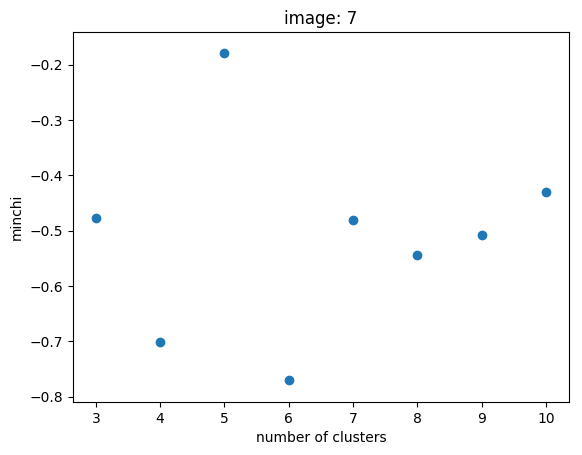

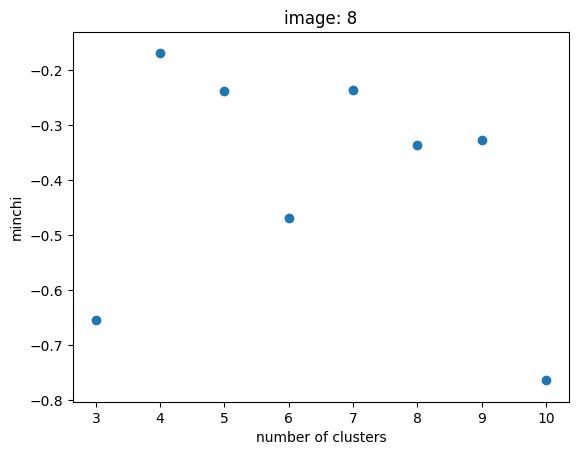

[3.0 -0.654287; 4.0 -0.169286; 5.0 -0.238075; 6.0 -0.468116; 7.0 -0.236597; 8.0 -0.335055; 9.0 -0.326586; 10.0 -0.764324]


In [11]:
for i in 1:8
    println("image", i)
    minchi = minChi(i, sigma, tau, symmetrize, ratematrix, kmin, kmax)
    PyPlot.figure()
    PyPlot.scatter(minchi[:,1], minchi[:,2])
    PyPlot.xlabel("number of clusters")
    PyPlot.ylabel("minchi")
    PyPlot.title(string("image: ",i))
    PyPlot.show()
    PyPlot.gcf()
    println(minchi)
end

4×4 Array{Float64,2}:
 0.864534   0.0178045  0.0528333  0.0648281
 0.0101237  0.858552   0.0294302  0.101894 
 0.0194765  0.0133085  0.942991   0.0242243
 0.0125598  0.0238389  0.0181672  0.945434 